In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:,.0f}'.format)

# Australian Agricultural Crop Analysis 2022-2024

This notebook analyzes production data for Australia's major grain and oilseed crops, examining patterns in production volumes, land usage, and economic value across seven key crops for the 2022-23 and 2023-24 growing seasons. The analysis provides insights into Australia's agricultural landscape, highlighting regional production patterns, resource allocation efficiency, and economic contributions of different crops.

**Key Crops Analyzed:**
* Wheat
* Barley
* Oats
* Canola
* Chickpeas
* Lentils
* Lupins

In [50]:
# load the dataframes
data_wheat = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 1', skiprows=4)
data_barley = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 2', skiprows=4)
data_oat = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 3', skiprows=4)
data_canola = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 4', skiprows=4)
data_chickpea = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 5', skiprows=4)
data_lentil = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 6', skiprows=4)
data_lupin = pd.read_excel('aus_crops_data.xlsx', sheet_name='Table 7', skiprows=4)

## Data Preparation

We begin by importing necessary libraries and setting display options to show values in a clean format with commas as thousand separators. Next, we'll load data for seven key Australian crops from separate Excel sheets.

In [51]:
# Function to remove the last row from each dataframe
def clean_dataframes(*dfs):
    """Remove the last row (copyright info) from each dataframe.
    Returns a list of cleaned dataframes."""
    cleaned_dfs = []
    for df in dfs:
        # Remove the last row and reset the index
        cleaned_df = df.iloc[:-1].copy()
        cleaned_dfs.append(cleaned_df)
    return cleaned_dfs

# Apply the function to all crop dataframes
[data_wheat_clean, data_barley_clean, data_oat_clean, data_canola_clean, 
 data_chickpea_clean, data_lentil_clean, data_lupin_clean] = clean_dataframes(
    data_wheat, data_barley, data_oat, data_canola, data_chickpea, data_lentil, data_lupin)

# Verify the last copyright row has been removed
print("Original last row of lentil data:")
display(data_lentil.tail(1))
print("\nCleaned lentil data (last row):")
display(data_lentil_clean.tail(1))

Original last row of lentil data:


,Region,Region codes,Data item,2022-23,2023-24
24,© Commonwealth of Australia,NaN,NaN,NaN,NaN



Cleaned lentil data (last row):


,Region,Region codes,Data item,2022-23,2023-24
23,Western Australia,5,Lentils for grain or seed - Number of levy pay...,15,20


## Data Cleaning

The datasets contain copyright information in the last row that needs to be removed. We create a utility function to clean all dataframes at once, removing these non-data rows while preserving the original data structure.

In [52]:
# is the data clean? 
data_wheat_clean.info()

# she's clean
data_wheat_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        32 non-null     object 
 1   Region codes  32 non-null     float64
 2   Data item     32 non-null     object 
 3   2022-23       32 non-null     float64
 4   2023-24       32 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.4+ KB


,Region,Region codes,Data item,2022-23,2023-24
0,Australia,0,Wheat for grain or seed - Levied production (t),"41,199,486","28,028,429"
1,Australia,0,Wheat - Total crop area (ha),"12,925,286","10,506,997"
2,Australia,0,Wheat for grain or seed - Local value of levie...,"13,535,387,531","8,830,461,592"
3,Australia,0,Wheat for grain or seed - Number of levy payer...,"22,735","19,800"
4,New South Wales,1,Wheat for grain or seed - Levied production (t),"11,194,843","8,387,085"


## Data Exploration

Let's examine the structure of our cleaned data to ensure it's ready for analysis. We'll focus first on the wheat dataset to understand its columns and content.

In [53]:
# let's take a deeper look at the wheat data
data_wheat_clean['% Change'] = (data_wheat_clean['2023-24'] - data_wheat_clean['2022-23']) / data_wheat_clean['2022-23'] * 100


## Year-over-Year Analysis

To understand how wheat production has changed between growing seasons, we'll calculate the percentage change for each data point.

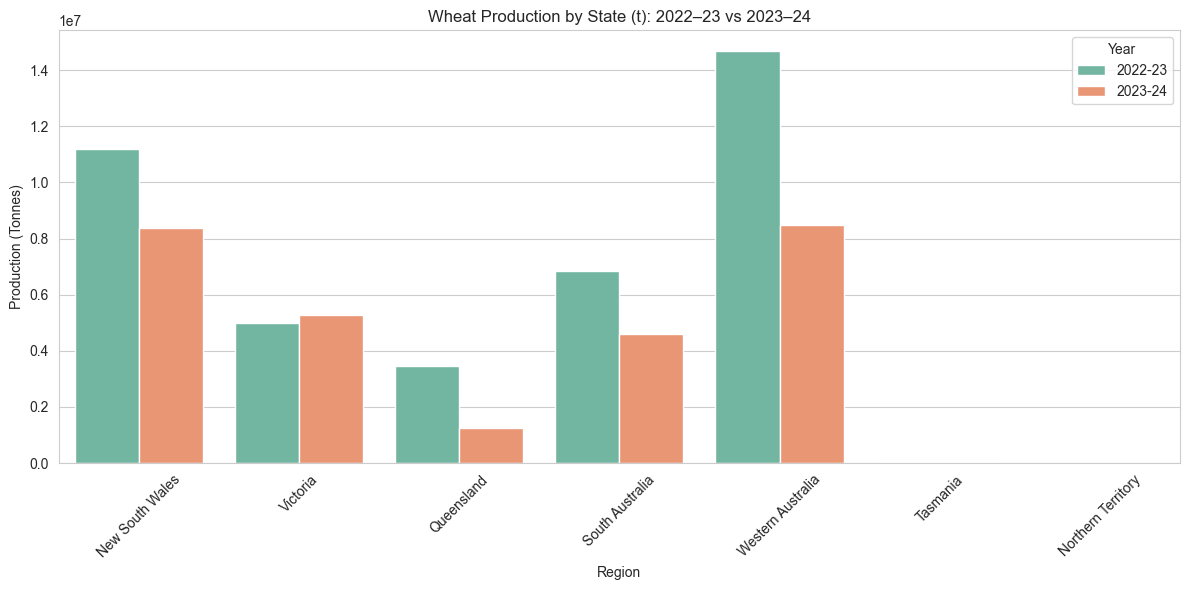

In [54]:
# Filter for 'Levied production' and exclude national total
df_plot = data_wheat_clean[
    (data_wheat_clean['Data item'] == 'Wheat for grain or seed - Levied production (t)') &
    (data_wheat_clean['Region'] != 'Australia')
].copy()

# Melt for seaborn-friendly long format
df_long = df_plot.melt(id_vars='Region', value_vars=['2022-23', '2023-24'],
                       var_name='Year', value_name='Tonnes')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='Region', y='Tonnes', hue='Year', palette='Set2')

plt.title("Wheat Production by State (t): 2022–23 vs 2023–24")
plt.ylabel("Production (Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Regional Wheat Production Comparison

This visualization shows wheat production by Australian state for the 2022-23 and 2023-24 growing seasons. We can observe that:

- Western Australia consistently leads in wheat production by a substantial margin
- New South Wales and Victoria show significant year-over-year variations
- Queensland and South Australia maintain more moderate production levels
- Tasmania has minimal wheat production compared to other regions

The percentage changes reveal which regions experienced growth or decline between seasons, helping identify areas of agricultural expansion or contraction.

In [55]:
crop_frames = {
    'Wheat': data_wheat_clean,
    'Barley': data_barley_clean,
    'Oats': data_oat_clean,
    'Canola': data_canola_clean,
    'Chickpeas': data_chickpea_clean,
    'Lentils': data_lentil_clean,
    'Lupins': data_lupin_clean
}

records = []

for crop, df in crop_frames.items():
    row = df[
        (df['Region'] == 'Australia') &
        (df['Data item'].str.contains('Levied production'))
    ]
    if not row.empty:
        records.append({
            'Crop': crop,
            '2022-23 (t)': row['2022-23'].values[0],
            '2023–24 (t)': row['2023-24'].values[0]
        })

df_crop_prod = pd.DataFrame(records)
df_crop_prod = df_crop_prod.sort_values(by='2023–24 (t)', ascending=False)
print(df_crop_prod)

        Crop  2022-23 (t)  2023–24 (t)
0      Wheat   41,199,486   28,028,429
1     Barley   13,491,375   10,961,886
3     Canola    8,917,862    7,504,667
5    Lentils    1,841,222    1,412,950
6     Lupins    1,279,707      831,186
2       Oats      959,829      737,119
4  Chickpeas      935,390      545,767


## National Crop Production Analysis

Having examined wheat production regionally, we'll now compare production volumes across all seven major crops. We'll create a consolidated dataset with nationwide production figures for each crop type.

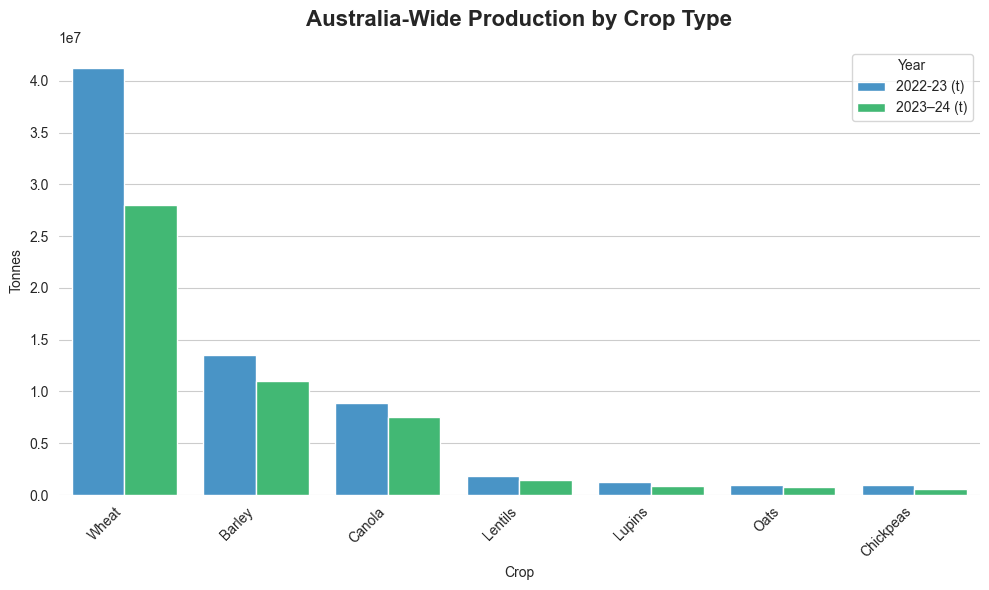

In [56]:
df_melted = df_crop_prod.melt(id_vars='Crop', var_name='Year', value_name='Tonnes')
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
custom_palette = ["#3498db", "#2ecc71"]  # Blue and green
sns.barplot(data=df_melted, x='Crop', y='Tonnes', hue='Year', palette=custom_palette)

plt.title("Australia-Wide Production by Crop Type", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("Tonnes")
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Australia-Wide Crop Production Comparison

This visualization compares production volumes across all major crops for two consecutive growing seasons. The custom color palette and clean design help highlight the dominance of certain crops in Australia's agricultural landscape.

In [57]:
records_area = []

for crop, df in crop_frames.items():
    row = df[
        (df['Region'] == 'Australia') &
        (df['Data item'].str.contains('Total crop area'))
    ]
    if not row.empty:
        records_area.append({
            'Crop': crop,
            'Area (ha)': row['2023-24'].values[0]
        })

df_area = pd.DataFrame(records_area)
df_area['Share of Area (%)'] = df_area['Area (ha)'] / df_area['Area (ha)'].sum() * 100
df_area = df_area.sort_values(by='Area (ha)', ascending=False)
print(df_area)


        Crop  Area (ha)  Share of Area (%)
0      Wheat 10,506,997                 51
1     Barley  4,001,070                 20
3     Canola  3,714,751                 18
5    Lentils    804,131                  4
6     Lupins    604,423                  3
2       Oats    541,563                  3
4  Chickpeas    288,825                  1


## Land Usage Analysis

Beyond production volumes, we'll analyze how agricultural land is allocated across different crop types. This helps us understand land use priorities and efficiency in Australian farming.

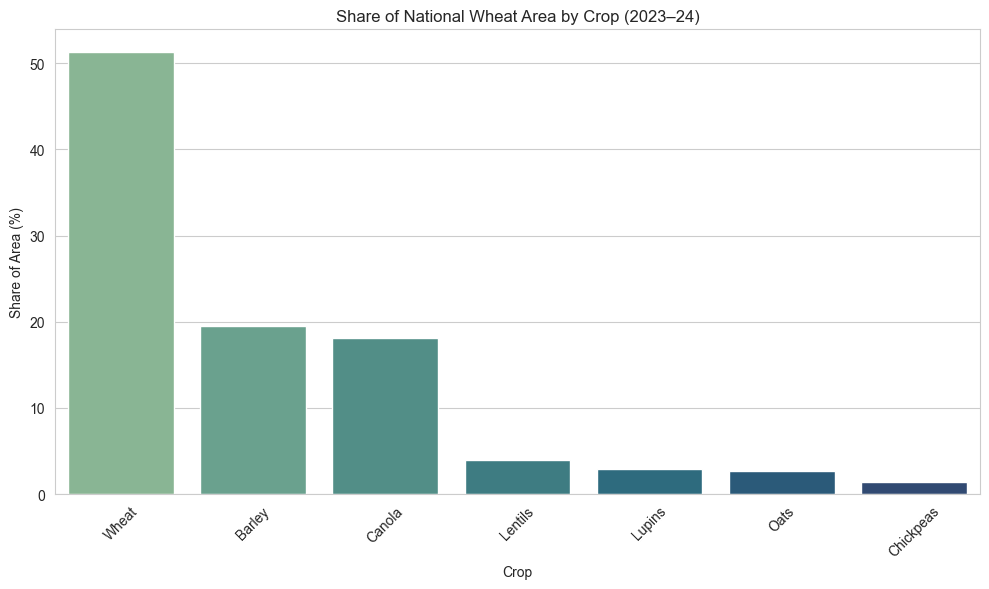

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_area, x='Crop', y='Share of Area (%)', palette='crest', hue='Crop')
plt.title("Share of National Wheat Area by Crop (2023–24)")
plt.ylabel("Share of Area (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Land Share Visualization

This chart shows the percentage of total agricultural land dedicated to each crop type. The visualization reveals how wheat dominates Australia's agricultural land use, followed by barley and canola.

In [ ]:
records_value = []

for crop, df in crop_frames.items():
    row = df[
        (df['Region'] == 'Australia') &
        (df['Data item'].str.contains('Local value of levied crop'))
    ]
    if not row.empty:
        records_value.append({
            'Crop': crop,
            'Value ($)': row['2023-24'].values[0]
        })

df_value = pd.DataFrame(records_value)

# Merge with area
df_area_value = df_area.merge(df_value, on='Crop')


## Economic Value Analysis

Next, we'll investigate the economic value of each crop to better understand their financial contribution to Australia's agricultural sector.

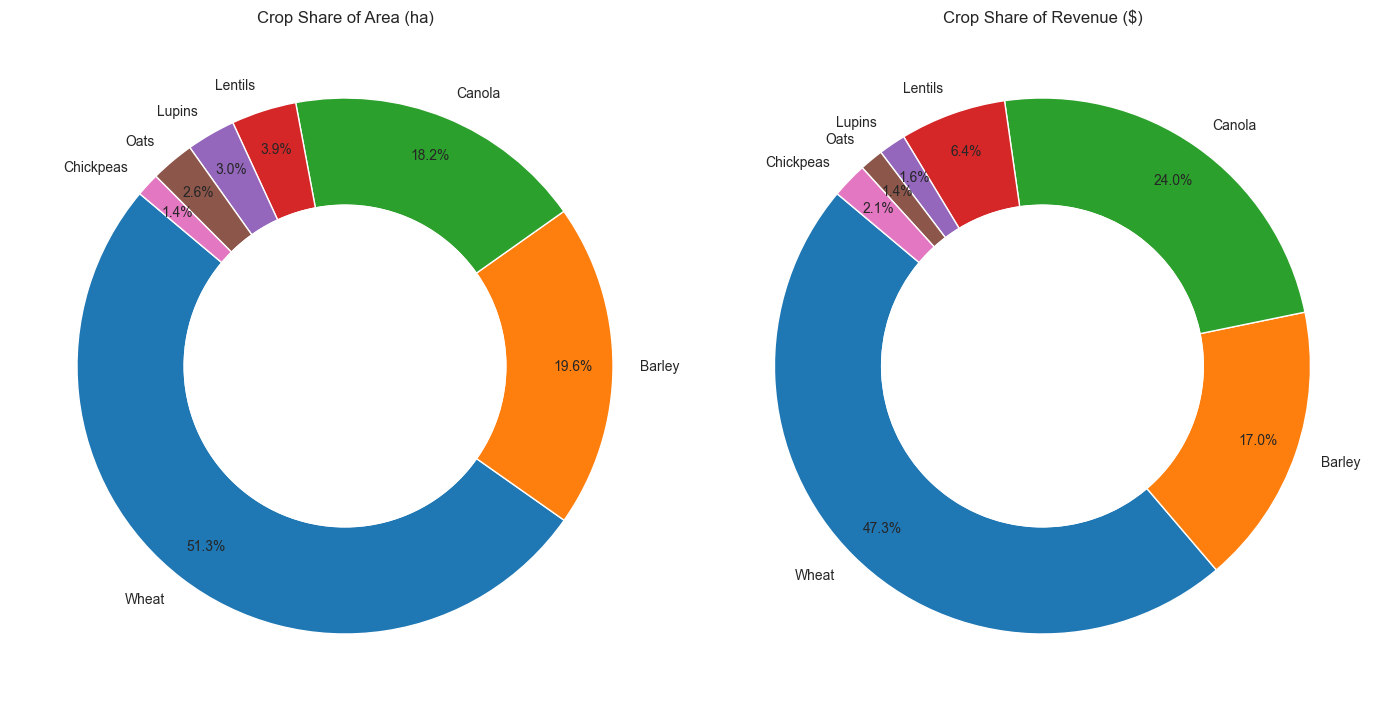

In [62]:
# Data: assumes df_area_value has ['Crop', 'Area (ha)', 'Value ($)']
area_data = df_area_value.set_index('Crop')['Area (ha)']
value_data = df_area_value.set_index('Crop')['Value ($)']

fig, axs = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# Area donut
wedges1, texts1, autotexts1 = axs[0].pie(
    area_data,
    labels=area_data.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4),
    pctdistance=0.85
)
axs[0].set_title("Crop Share of Area (ha)")

# Value donut
wedges2, texts2, autotexts2 = axs[1].pie(
    value_data,
    labels=value_data.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4),
    pctdistance=0.85
)
axs[1].set_title("Crop Share of Revenue ($)")

# Center circles
for ax in axs:
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax.add_artist(centre_circle)

plt.tight_layout()
plt.show()


### Area vs. Value Comparison

These donut charts provide an insightful comparison between the share of land area dedicated to each crop and the share of revenue they generate. This visualization helps identify crops that produce higher economic value relative to the land they occupy.

In [ ]:
# Calculate production efficiency (tonnes per hectare)
df_prod_efficiency = pd.DataFrame({
    'Crop': df_area_value['Crop'],
    'Area (ha)': df_area_value['Area (ha)'],
    'Production (t)': df_crop_prod['2023–24 (t)'].values,
    'Value ($)': df_area_value['Value ($)']    
})

# Calculate efficiency metrics
df_prod_efficiency['Tonnes per Hectare'] = df_prod_efficiency['Production (t)'] / df_prod_efficiency['Area (ha)']
df_prod_efficiency['Value per Hectare ($)'] = df_prod_efficiency['Value ($)'] / df_prod_efficiency['Area (ha)']
df_prod_efficiency['Value per Tonne ($)'] = df_prod_efficiency['Value ($)'] / df_prod_efficiency['Production (t)']

# Display the results
df_prod_efficiency = df_prod_efficiency.sort_values('Tonnes per Hectare', ascending=False)
print(df_prod_efficiency[['Crop', 'Tonnes per Hectare', 'Value per Hectare ($)', 'Value per Tonne ($)']])

# Create visualization of production efficiency
plt.figure(figsize=(14, 6))

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# First subplot: Tonnes per Hectare
sns.set_style("whitegrid")
sns.barplot(x='Crop', y='Tonnes per Hectare', 
            data=df_prod_efficiency.sort_values('Tonnes per Hectare', ascending=False),
            palette='viridis', ax=ax1)

ax1.set_title('Production Efficiency by Crop', fontsize=16, fontweight='bold')
ax1.set_xlabel('Crop Type', fontsize=12)
ax1.set_ylabel('Tonnes per Hectare', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add data labels
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Second subplot: Value per Hectare
sns.barplot(x='Crop', y='Value per Hectare ($)', 
            data=df_prod_efficiency.sort_values('Value per Hectare ($)', ascending=False),
            palette='viridis', ax=ax2)

ax2.set_title('Economic Efficiency by Crop', fontsize=16, fontweight='bold')
ax2.set_xlabel('Crop Type', fontsize=12)
ax2.set_ylabel('Value per Hectare ($)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Add data labels with shortened format
for i, p in enumerate(ax2.patches):
    value = p.get_height()
    if value >= 1000:
        formatted_value = f'${value/1000:.1f}K'
    else:
        formatted_value = f'${value:.0f}'
    
    ax2.annotate(formatted_value, 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust layout
plt.tight_layout()
plt.show()

## Production Efficiency Analysis

This section examines the efficiency metrics for each crop in terms of:

1. **Production Efficiency**: Yield in tonnes per hectare
2. **Economic Efficiency**: Revenue generated per hectare
3. **Price Efficiency**: Value per tonne

These metrics help identify which crops maximize output given limited land resources and which crops provide the best financial returns for Australian farmers.

## Conclusion

This analysis of Australian crop production reveals several key insights:

1. **Production Dominance**: Wheat is Australia's dominant crop by a significant margin, both in terms of production volume and land area used. 

2. **Production Efficiency**: While wheat dominates in area and total production, certain crops like canola show higher value-to-area ratios, suggesting they may be more economically efficient in terms of revenue generation per hectare.

3. **Regional Variation**: The state-by-state analysis of wheat production reveals significant regional differences, highlighting the importance of geographical factors in agricultural production.

4. **Year-over-Year Changes**: The comparison between 2022-23 and 2023-24 seasons shows varying patterns of change across different crops, reflecting the dynamic nature of agricultural production influenced by market conditions, climate, and other factors.

These findings provide valuable insights for agricultural planning, investment decisions, and policy considerations in Australia's farming sector. Future analysis could explore the relationship between climate patterns and yield variations, or examine how international market prices affect domestic production decisions.